Marketing Campaign Data Analysis

In this project, I will do some basic cleaning and analyzing of marketing data from a brick and mortar business. The store sells various food and drink items and take orders in-store, on the web, and through catalogs. I will be cleaning the data, finding the most popular products, and finding which method of purchase is most utilized.

First let's load the data and take a look.

In [115]:
import pandas as pd
import numpy as np
marketing = pd.read_csv("/Users/inezleon/Desktop/marketing_campaign.csv", sep=";")
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Let's delete uneccessary columns and rename some columns.

In [117]:
marketing.drop(["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response"], axis=1).describe()



,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


In [108]:
marketing.rename(columns = {'Year_Birth':'YearBirth',
                            'Marital_Status':'MaritalStatus',
                            'Kidhome':'KidHome',
                            'Teenhome':'TeenHome',
                            'Dt_Customer':'DtCustomer',
                            'Z_CostContact':'ZCostContact',
                            'Z_Revenue':'ZRevenue'},inplace=True)
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   YearBirth            2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   MaritalStatus        2240 non-null   object 
 4   Income               2216 non-null   float64
 5   KidHome              2240 non-null   int64  
 6   TeenHome             2240 non-null   int64  
 7   DtCustomer           2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Next let's check for nulls.

In [17]:
marketing.isna().any()

ID                     False
YearBirth              False
Education              False
MaritalStatus          False
Income                  True
KidHome                False
TeenHome               False
DtCustomer             False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
ZCostContact           False
ZRevenue               False
Response               False
dtype: bool

In [22]:
marketing.Income.isna().sum()

24

These 24 people chose to not disclose their income which is fine. Let's just fill those missing income values with the average income based on education. To do this we will use a for loop and create a filter.

In [128]:
unique_Education = pd.unique(marketing.Education)
temp_data = marketing.copy()
columns = ['Income']
for c in unique_Education:
    education_filter = temp_data.Education == c
    filtered_data = temp_data[education_filter]
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]),2)
        if ~np.isnan(mean):
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing value in {s} column fill with {mean} when education:{c}")
        else:
            all_data_mean = np.round(np.mean(marketing[s]),2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing value in {s} column fill with {all_data_mean}")
    temp_data[education_filter] = filtered_data
                
marketing = temp_data.copy()

Missing value in Income column fill with 52720.37 when education:Graduation
Missing value in Income column fill with 56145.31 when education:PhD
Missing value in Income column fill with 52917.53 when education:Master
Missing value in Income column fill with 20306.26 when education:Basic
Missing value in Income column fill with 47633.19 when education:2n Cycle


/var/folders/rk/rxbbys895wn2qpw7t8xg5tjr0000gn/T/ipykernel_27477/1981817513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[s] = filtered_data[s].fillna(mean)


Now let's check to see that there are no nulls in the Income column anymore.

In [129]:
marketing.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

To start analyzing, let's get a visualization comparing the revenue from all sold products.

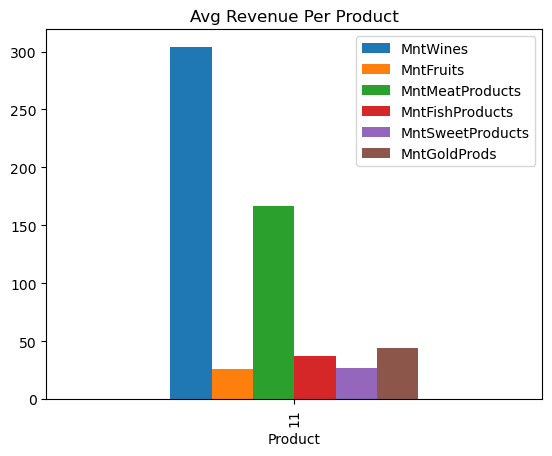

In [59]:
from matplotlib import pyplot as plt
avg_revenue_per_product = marketing.groupby("ZRevenue")[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].mean()
avg_revenue_per_product.plot(kind="bar")
plt.title("Avg Revenue Per Product")
plt.xlabel("Product")
plt.show()



It seems that wine and meat are the top sold products. The store can now stock and market products accordingly.
We can see from the earlier .describe() table that the average age demographic of this store is a bit above middle aged. Let's take a look at the relationship between ages of customers and method of purchase.

<AxesSubplot:xlabel='YearBirth'>

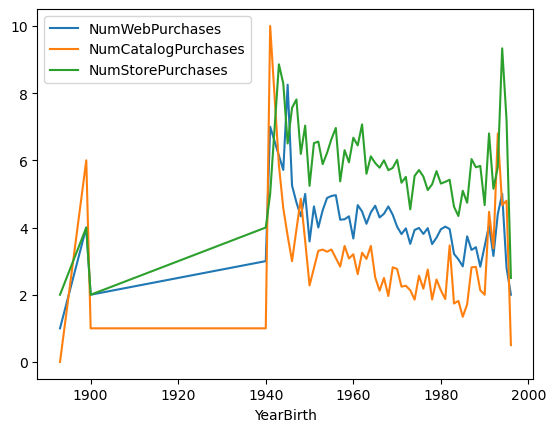

In [63]:
avg_age_by_purchasetype = marketing.groupby("YearBirth")[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].mean()
avg_age_by_purchasetype.plot(kind='line')


From this plot, we can see that most purchases by all age groups are made in-store so therefore the store's main demographic is local. The store can best utilize physical advertisements in local businesses or billboards/signs to cater to their largest demographic if there are events, new products, or sales happening.

Thank you for reading!